# Notes
- Bokeh, Qt - other graphics packages for python
- https://github.com/scalesd
- Rick

# A Brief Intro to NumPy

## What is NumPy?
NumPy is a python library that makes it easier to work with numerical algorithms in python.

## Why do we want to use NumPy for working with data?
NumPy makes it easy to perform operations on the scale of _N-d arrays_ of data.

### Example 1: Adding one to every element of the list

First, we make a list with `n_lst` sequential integers

In [1]:
n_lst = 11
lst = list(range(n_lst))

print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Then add one to each element the straightforward way, with a loop.

In [2]:
augListClassic = lst.copy()
for i in range(len(lst)):
    augListClassic[i] += 1
    
print(augListClassic)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In Python we can do this in several different ways, e.g. using a list comprehension:

In [3]:
augListComprehension = [x+1 for x in lst]

print(augListComprehension)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


NumPy allows us to implicitly perform operations "entry-wise" on entire arrays as if these arrays were values

In [4]:
# When we use Numpy, we need to import the module first. 
# We give it the alias "np" which is fairly common.
import numpy as np 

# We will copy our python list into a Numpy "array" data structure.
npArry = np.array(lst)
augNpArry = npArry + 1

print(augNpArry)

[ 1  2  3  4  5  6  7  8  9 10 11]


### Example 2:  Indexing Modes
Note that Jupyter maintains the state of the underlying python environment, i.e. libraries as well as variables, are maintained across cells. So we don't need to import NumPy again unless we restart the notebook.

In the first part of this example, we will make a "triangle" out of our earlier [1,11] list, and explore some of the "indexing modes" available in  NumPy.

First, the "vanilla" Python way.

In [5]:
lstTri = lst.copy()
for i in range(len(lst)):
    if lst[i] > 5:
        lstTri[i] = 10-lst[i]
        
print(lstTri)

[0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0]


You can index NumPy arrays just like Python lists, and just like in Python, in NumPy this is called _slicing_. For an array, `<array name>[<start>:<end>:<stride>]` will give you access to the array values beginning at index `<start>`, steping by length `<stride>` and ending (but not including!) index `<end>`. As a shortcut if you want to start from index `0`, end at the end of the array, or have a stride length of `1`, you can just leave them out. 

Here's an few examples,

In [6]:
print(npArry) # Just print the whole array for comparison
print(npArry[2:10:2]) # Print even numbers starting from the 3rd index
print(npArry[2::2]) # Shortcut, this does the same thing (because our list has length 11)
print(npArry[:4]) # The first 4 entries
print(npArry[-4:]) # The last 4 entries
print(npArry[::-1]) # Reverse the array

[ 0  1  2  3  4  5  6  7  8  9 10]
[2 4 6 8]
[ 2  4  6  8 10]
[0 1 2 3]
[ 7  8  9 10]
[10  9  8  7  6  5  4  3  2  1  0]


Next we'll do an "Triangular" example that we will use to introduce some more advanced indexing strategies. First, by slicing:

In [7]:
npArryTri = npArry.copy()
# Start from index 6 and go to the end
npArryTri[6:] = 10-npArry[6:] 

print("Sub-array we're working with:", npArry[6:])
print('Result:', npArryTri)

Sub-array we're working with: [ 6  7  8  9 10]
Result: [0 1 2 3 4 5 4 3 2 1 0]


NumPy also offers many array indexing methods that allow you to access entries by their _values_. This is extremely useful when, for example, selecting subsets of data when you don't know where they are in the array, but you know what they look like. 

We will first create a "logical array" -- an array of Boolean `True`/`False` values that is the _same length_ original array -- that is set to `True` at the indices that we are going to operate on. The great thing is that we can use NumPy's entry-wise operations to do this.

In [8]:
npArryTriBool = npArry.copy()
# Create a logical index vector that is True for the indices we want to operate on
idx = npArry > 5
# Use the index vector to select the sub-array we would like to work with, 
# and subtract all entries of the sub-array from 10 in a single line
npArryTriBool[idx] = 10-npArry[idx] 

print('Index vector: ', idx)
print("Sub-array we're working with:", npArry[idx])
print('Result:', npArryTriBool)

Index vector:  [False False False False False False  True  True  True  True  True]
Sub-array we're working with: [ 6  7  8  9 10]
Result: [0 1 2 3 4 5 4 3 2 1 0]


Next we're going to look at a multiple numerical indexing, using NumPy's `where` function.

In [9]:
npArryTriNIdx = npArry.copy()
# This next line is the difference (np.where returns a tuple -- it's a very flexible function)
idx = np.where(npArry > 5)[0]
npArryTriNIdx[idx] = 10-npArry[idx] 

print('Index vector: ', idx)
print("Sub-array we're working with:", npArry[idx])
print('Result:', npArryTriNIdx)

Index vector:  [ 6  7  8  9 10]
Sub-array we're working with: [ 6  7  8  9 10]
Result: [0 1 2 3 4 5 4 3 2 1 0]


Using numerical indexing, we don't have to have a list that is the same length, and we can freely _reorder_ the indices of the index list according to permutations.

In [10]:
npArrySawtooth = npArry.copy()
# Select like we did before
idx = np.where(npArry > 5)[0]
# Reverse the indices for assignment
npArrySawtooth[idx[::-1]] = 10-npArry[idx] 
print('Result:', npArrySawtooth)

Result: [0 1 2 3 4 5 0 1 2 3 4]


### Example 2.5: Making useful test cases 

It is often very helpful to generate small test examples first, before performing operations on real data. Software engineers call this "test-driven development" and you'll make a lot fewer headaches for yourself if you get into the habit of testing each step of your data visualization and analysis.

So first, we'll make a matrix that we can use for the demo. I want this matrix to have recognizable, but different, values in each row and column so that we can see what we did. This means a matrix of all the same value, or random values won't work because I won't be able to _easily_ tell what happened.

We're going to use the NumPy function `meshgrid` for this. `meshgrid` generates a pair of matrices, let's call them X and Y, that together form the coordiantes of a "mesh". In addition to how we'll use it, it is also useful for 3-d plotting, and specifying points on a grid.

Step 1) use the NumPy function `meshgrid` to generate a pair of matrices with repeating columns and rows.

In [11]:
X, Y = np.meshgrid(range(4),range(4))

print('X:\n', X)
print()
print('Y:\n', Y)

X:
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

Y:
 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


Step 2) Add these matrices together, element-by-element.

In [12]:
XpY = X + Y

print('XpY:\n', XpY)

XpY:
 [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


Step 3) This almost meets our criteria, but we want to make sure we can differentiate rows from columns (right now, row `i` equals column `i`). To fix this, we'll flip it over, left-to-right using `fliplr`.

In [13]:
npNdArry = np.fliplr(XpY)

print('npNdArry:\n', npNdArry)

npNdArry:
 [[3 2 1 0]
 [4 3 2 1]
 [5 4 3 2]
 [6 5 4 3]]


Element-wise operations won't work if matrices aren't the same shape. 

Determine array shapes with the `shape` field of the array object.

In [14]:
print('Shape of Y:', Y.shape)

Shape of Y: (4, 4)


Many times you'll find yourself wanting to generate your test cases again, so it can be handy to wrap them in functions.

Note that functions persist in the Jupyter notebook just like variables, until you restart the notebook.

In [15]:
def make_test_matrix(size=4):
    """
    Generate a size X size square matrix for testing operations.
    size defaults to 4
    """
    X, Y = np.meshgrid(range(size),range(size))
    XpY = X + Y
    npNdArry = np.fliplr(XpY)
    
    return npNdArry

### Example 3: Multidimensional array indexing
Pull out a "view" of the first column

In [16]:
firstCol = npNdArry[:,0]

print(firstCol)

[3 4 5 6]


What do I mean by "view"?

In [17]:
firstCol[0] = 1000

print('npNdArry:\n', npNdArry)

npNdArry:
 [[1000    2    1    0]
 [   4    3    2    1]
 [   5    4    3    2]
 [   6    5    4    3]]


By default, indexing operations on Numpy arrays return references to the original data in memory. In order to make a copy, you must explicitly call the `copy()` function, as we did before with python lists. This is internally consistent with how Python treats objects in general (by-reference object handling).


Pull out a view of the first row

In [18]:
firstRow = npNdArry[0,:]

print(firstRow)

[1000    2    1    0]


The intuitions we developed before work the same way on N-d arrays

In [19]:
npNdArry[npNdArry > 3] = 0

print('npNdArry:\n', npNdArry)

npNdArry:
 [[0 2 1 0]
 [0 3 2 1]
 [0 0 3 2]
 [0 0 0 3]]


We can realize complex operations easily using this syntax.

E.g. set every element to -1 of each row with where the last element is 2 or 0

In [20]:
last = npNdArry[:,-1]
npNdArry[(last == 2) | (last == 0),:] = -1

print('npNdArry:\n', npNdArry)

npNdArry:
 [[-1 -1 -1 -1]
 [ 0  3  2  1]
 [-1 -1 -1 -1]
 [ 0  0  0  3]]


Let's reset our matrix

In [21]:
npNdArry = make_test_matrix()

print('npNdArry:\n', npNdArry)

npNdArry:
 [[3 2 1 0]
 [4 3 2 1]
 [5 4 3 2]
 [6 5 4 3]]


We're going to shuffle the rows at random using `permutation()` from NumPy's `random` module.

In [22]:
shuffledIdx = np.random.permutation(npNdArry.shape[0])

print(shuffledIdx)

[3 2 1 0]


We're going to use this permutation to reorder the matrix rows.

Note that we wouldn't be able to shuffle like this with logical indexing alone.

In [23]:
npNdArryShuffled = npNdArry[shuffledIdx,:]

print('npNdArryShuffled:\n', npNdArryShuffled)

npNdArryShuffled:
 [[6 5 4 3]
 [5 4 3 2]
 [4 3 2 1]
 [3 2 1 0]]


### Example 4: Vectorized operations

Use the `np.vectorize` function to turn a function of a single variable into one that applies a function to every element of an array. This is similar to a list comprehension or Python's native `map()`, but is easier to use when working with Numpy N-d arrays.

Note that `vectorize` doesn't make your code faster! A function applied over 100 elements will take 100 times as long.

We're going to create a function that converts numeric arrays into their (zero-indexed) alphabetical equivalent.

In [24]:
convertToABC = np.vectorize(lambda x: chr(x+65))

In [25]:
npNdArryABC = convertToABC(npNdArry)

print('npNdArryABC:\n', npNdArryABC)

npNdArryABC:
 [['D' 'C' 'B' 'A']
 ['E' 'D' 'C' 'B']
 ['F' 'E' 'D' 'C']
 ['G' 'F' 'E' 'D']]


# Now for a little bit of Pandas 

Pandas is a _high level_ library for working with data. Where NumPy is a tool for developing numerical algorithms, Pandas is great for working with data at the `DataFrame` level, and functions much like a relational database front-end.

To see what we mean here, first we're going to load some of the San Diego parking data into a Pandas `DataFrame` object (we're only going to take a small region, on account of the size data files).

You can read more about the various formats Pandas can read and write (there are many, including the system clipboard!) at the [Pandas IO Tools Documentation](https://pandas.pydata.org/pandas-docs/stable/io.html).

We're going to cover a few basics that will enable us to start working with the parking data rather quickly, but be sure to take a look at the [Fast Tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html) on the Pandas website (they say 10 min, I would set aside a bit more time than that).

In [26]:
dataPath = './'
dataFile = dataPath + 'subregion.csv'

import pandas as pd

# Read the csv file into a DataFrame
df = pd.read_csv(dataFile)

# Let's see how many transactions records we've pulled in
print('Rows',df.shape[0],': Cols',df.shape[1])

Rows 478138 : Cols 15


We can view the top few rows of the DataFrame using the `head()` function

Let's take a few seconds to look at what we're dealing with.

In [27]:
print(df.head())

    id                     uuid  pole_id meter_type  trans_amt   pay_method  \
0   79  MSKT700W160101080515675  KT-700W         MS      675.0  CREDIT CARD   
1  119  MSKT700W160101084910675  KT-700W         MS      675.0  CREDIT CARD   
2  128  MSKT700W160101085540675  KT-700W         MS      675.0  CREDIT CARD   
3  188  MSKT700W160101093348650  KT-700W         MS      650.0  CREDIT CARD   
4  190  MSKT700W160101093634650  KT-700W         MS      650.0  CREDIT CARD   

           trans_start         meter_expire      zone    area  \
0  2016-01-01 08:05:15  2016-01-01 17:05:15  Downtown  Marina   
1  2016-01-01 08:49:10  2016-01-01 17:49:10  Downtown  Marina   
2  2016-01-01 08:55:40  2016-01-01 17:55:40  Downtown  Marina   
3  2016-01-01 09:33:48  2016-01-01 18:00:00  Downtown  Marina   
4  2016-01-01 09:36:34  2016-01-01 18:00:00  Downtown  Marina   

           sub_area  config_id                               config_name  \
0  700 KETTNER BLVD      13177  MSPM 9 Hour Max $0.75 HR 8

Jupyter is "DataFrame aware" and will pretty-print them for you without the `print` function. `head(<number of rows>)` is also a valid call, and does what you expect (as does `.tail()`).

In [28]:
df.head(3)

,id,uuid,pole_id,meter_type,trans_amt,pay_method,trans_start,meter_expire,zone,area,sub_area,config_id,config_name,longitude,latitude
0,79,MSKT700W160101080515675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:05:15,2016-01-01 17:05:15,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603
1,119,MSKT700W160101084910675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:49:10,2016-01-01 17:49:10,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603
2,128,MSKT700W160101085540675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:55:40,2016-01-01 17:55:40,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603


If you want to pull out specific rows and columns, you can use column names, and the `.iloc[<row_number>]` function. This is like NumPy's index selection, but grabs rows, 

In [29]:
print(df['area'].iloc[0])

Marina


The `.loc[<row_index_name>]` pulls out rows _by index_. The index on our `DataFrame` is the row number at the moment. We're going to set it so the _id_ (it's row number in the original csv file) and use `.loc[<row_index_name>` to pull it out.

In [30]:
print(df.set_index('id', verify_integrity=True)['area'].loc[128])

Marina


We can also see the datatypes of each column using the `.dtypes` field. DataFrame objects support differing per-column datatypes in a smooth way (unlike NumPy matrices). For arbitrary and previously unexplored csv files, it's often good to check these to see what we're working with. 

Note that these are _NumPy_ datatypes. Pandas is built on top of NumPy N-d arrays, among other things.

In [31]:
print(df.dtypes)

id                int64
uuid             object
pole_id          object
meter_type       object
trans_amt       float64
pay_method       object
trans_start      object
meter_expire     object
zone             object
area             object
sub_area         object
config_id         int64
config_name      object
longitude       float64
latitude        float64
dtype: object


Pandas contains some powerful tools for working with dates and times (such as one might use to build a time/transaction model, a short while from now...). 

We'll add a new column, translating the trans_start column into a `datatime64` object.

Notice that we can access `DataFrames` using their header names. In this way, `DataFrames` are like Python dictionaries of NumPy arrays. Note that this is almost what is going on under the hood, modulo a ton of features and technicalities (the [source code](https://github.com/pandas-dev/pandas/blob/master/pandas/core/frame.py) is available for some light reading).

Pandas has great support for timeseries data. We're going to do some conversions from strings representing times into `datetime64` datatypes so that we can to some _time arithmetic_. We're going to add these as new columns, so that we don't disturb the original data.

Note that this is another good practice. If you are going to modify types, then add columns (if your data are too big for this, consider working on a sample while you are exploring your dataset). 

That way you are not making modifications to the data in memory, which might break other modules and have you chasing down bugs.

The Pandas `to_datetime` function will allow us to make conversions on entire columns (they are _vectorized_ already), and specifiy the format of the strings we are going to convert.

In [32]:
df['start_timestamp'] = pd.to_datetime(df['trans_start'], format='%Y-%m-%d %H:%M:%S')
df['expire_timestamp'] = pd.to_datetime(df['meter_expire'], format='%Y-%m-%d %H:%M:%S')

In [33]:
df.head(3)

,id,uuid,pole_id,meter_type,trans_amt,pay_method,trans_start,meter_expire,zone,area,sub_area,config_id,config_name,longitude,latitude,start_timestamp,expire_timestamp
0,79,MSKT700W160101080515675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:05:15,2016-01-01 17:05:15,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603,2016-01-01 08:05:15,2016-01-01 17:05:15
1,119,MSKT700W160101084910675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:49:10,2016-01-01 17:49:10,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603,2016-01-01 08:49:10,2016-01-01 17:49:10
2,128,MSKT700W160101085540675,KT-700W,MS,675.0,CREDIT CARD,2016-01-01 08:55:40,2016-01-01 17:55:40,Downtown,Marina,700 KETTNER BLVD,13177,MSPM 9 Hour Max $0.75 HR 8am-6pm Mon-Sat,-117.169281,32.713603,2016-01-01 08:55:40,2016-01-01 17:55:40


We're going to make two more columns out of our timestamps by pulling out the _hour_ [0,23] and _minute_ [0,59] fields of the `datetime` objects. I'm using the `.apply()` function, which works almost just like `vectorize` in NumPy, but you call it directly on the DataFrame.

In [35]:
df.tail(3)

,id,uuid,pole_id,meter_type,trans_amt,pay_method,trans_start,meter_expire,zone,area,sub_area,config_id,config_name,longitude,latitude,start_timestamp,expire_timestamp,start_hour,start_minute,start_month
478135,10109593,MSWB500N161231164002175,WB-500N,MS,175.0,CREDIT CARD,2016-12-31 16:40:02,2016-12-31 18:00:00,Downtown,Core - Columbia,500 WEST B ST,13180,MSPM 2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.167937,32.717679,2016-12-31 16:40:02,2016-12-31 18:00:00,16,40,12
478136,10109837,MSWB500N161231164619175,WB-500N,MS,175.0,CREDIT CARD,2016-12-31 16:46:19,2016-12-31 18:00:00,Downtown,Core - Columbia,500 WEST B ST,13180,MSPM 2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.167937,32.717679,2016-12-31 16:46:19,2016-12-31 18:00:00,16,46,12
478137,10111220,MSWB500N16123117301675,WB-500N,MS,75.0,CREDIT CARD,2016-12-31 17:30:16,2016-12-31 18:00:00,Downtown,Core - Columbia,500 WEST B ST,13180,MSPM 2 Hour Max $1.25 HR 8am-6pm Mon-Sat,-117.167937,32.717679,2016-12-31 17:30:16,2016-12-31 18:00:00,17,30,12


In [34]:
df['start_hour'] = df['start_timestamp'].apply(lambda x: x.hour)
df['start_minute'] = df['start_timestamp'].apply(lambda x: x.minute)
df['start_month'] = df['start_timestamp'].apply(lambda x: x.month)

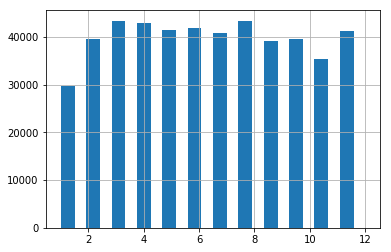

In [42]:
df['start_month'].hist(bins=12, width=.5)
plt.show()

Each transaction has paticular _features_ that we can use to say whether the transactions are similar. 

For example, a transaction is (almost) uniquely defined by its start time, expiration time, and location. A transaction that is "nearby" might have a few of those things in common. We can be very flexible in our definition of what _close_ means. 

Keeping that in mind, creative ideas of distance are some of the most powerful tools in our data toolbox.

Let's do some (very basic) _feature engineering_ and add a _duration_ column to our DataFrame.

In [36]:
# Here's some of that "time arithmetic" I mentioned.
durations = df['expire_timestamp'] - df['start_timestamp']
# I'm going to add "duration" so that it is a floating point number
# and digits before the decimal point are hours.
df['duration'] = durations.apply(lambda x:x.seconds/60**2)

print(df.dtypes)

id                           int64
uuid                        object
pole_id                     object
meter_type                  object
trans_amt                  float64
pay_method                  object
trans_start                 object
meter_expire                object
zone                        object
area                        object
sub_area                    object
config_id                    int64
config_name                 object
longitude                  float64
latitude                   float64
start_timestamp     datetime64[ns]
expire_timestamp    datetime64[ns]
start_hour                   int64
start_minute                 int64
start_month                  int64
duration                   float64
dtype: object


## Creating a really simple hour/transaction model

Building statistical models is a core activity in statistics, and its progeny, data science, and machine learning. So when I say "model" what I mean is a function of data that allows me to make statements that are _predictive_ of other data, and (sometimes) allows us to say something about likely relationships between variables.

In the next cell I've built a function that we're going to use a few times.

What we're doing in this function is building two histograms (a _joint_ histogram), and plotting them.

This may look like a big blob (a lot of plotting code looks like this) but we'll take it a step at a time.

In [37]:
# Matplotlib is the library that the Pandas plotting tools use. They are well-integrated.
import matplotlib.pyplot as plt

def show_hist(counts, durations, countsMonth):
    '''
    This plots transaction time and duration histograms
    counts is a series of transaction counts, indexed by hour
    durations is a series of average durations, also indexed by hour
    ''' 
    # Because we want to align our axes, we're going to grab the indices
    hr = durations.index.values
    # Hours are in the range [0,23], but transactions don't exist for all of them
    # So we pull out the minimum as an offset for plotting (so we don't end up with blank space)
    offset = np.min(hr)
    hroff = hr - offset
    
    # We're going to use 12-plus-12 instead of 24 as our hour-of-day format
    labels = (hr-1)%12+1

    # Next is a matplotlib function that allows us to make a "grid" of plots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=plt.figaspect(1.2), sharex=True)
    
    # I often set dpi myself, so that I can control the resolution for more detailed plots
    fig.set_dpi(100)

    # Now for the actual plotting.
    # Pandas lets us call '.plot(...)' function directly on DataFrame and Series objects
    # I'm going to explicitly set some things here (particularly the `axes[0]` is important for the grid), 
    # but you can also use automatic settings
    # Matplotlib plots have a very large number of options
    counts.plot(kind='bar', align='edge', width=.2, ax=axes[0])
    # Some properties of the axis
    axes[0].grid(linestyle=':')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Transaction Count by Hour (2016)')

    # Additional plotting for the second axis. 
    # This time I'm rotating the plot and setting the alginment to `hroff` 
    # so that we have an intuitive alignment.
    durations.plot(kind='barh', align='edge', width=.5, left=hroff, ax=axes[1])

    axes[1].set_xticks(hroff)
    axes[1].set_yticklabels(labels)
    axes[1].set_xticklabels(labels)

    axes[1].grid(linestyle=':')
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('Hour of Day')
    axes[1].set_title('Average Duration Windows (2016)')
    
    countsMonth.plot(kind='bar', align='edge', width=.2, ax=axes[0])
    # Some properties of the axis
    axes[2].grid(linestyle=':')
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('Count')
    axes[2].set_title('Transaction Count by Month (2016)')

    plt.tight_layout()
    plt.show()

Next, we want to gather up the summary statistics that we need for the plot. These are counts and average durations.

Pandas lets us do this with the `.groupby()` function, where `.groupby(<column_name>)` will create _groups_ of row indices such that the value of `<column_name>` for each group is unique, then we can call _aggregation_ funcitons on them. Note that `.groupby()` has a lot of functionality (as always, take a look at the [docs and tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) for details, the cookbook is great for examples as well).

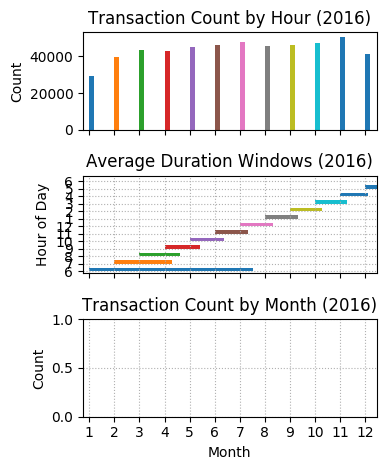

In [38]:
dfCount = df.groupby('start_hour')['uuid'].count()
dfDuration = df.groupby('start_hour')['duration'].mean()
dfCountMonth = df.groupby('start_month')['duration'].count()

# Calling our plotting function
show_hist(dfCount, dfDuration, dfCountMonth)

Now we're looking at an overall histogram of the number of hourly transactions (the "transaction rate"), and we can see that, on average, people who arrive at 6 am are staying until lunch. 

So, we should be able to make predictions based off this regarding demand and availability, right, _right_?

Unfortunately, it is not so simple.

# Bias/Variance Example and Discussion

Just because we see something doesn't mean other things we see will be the same, and just because we have constructed a model from data doesn't mean new/other data will be predicted by the model.

#### Often, we have to make a trade-off between a modeling approach that has  capability of fitting our data really well, but performs poorly on other data (i.e. the model is overfit to the data), and a model that generalizes, to other data but "equally poorly", but is more consistent overall.

#### That is, between the upper right and lower left targets in the image below.
<img src="bias_variance.png" alt="Bias/Variance" style="width: 400px"/>
Image sourced from [Scott Fortmann-Roe's essay](http://scott.fortmann-roe.com/docs/BiasVariance.html) on the subject. A recommended read! One thing I will emphasize that he mentions only briefly is that the Bias-Variance decomposition he's using applies to models built using least squares cost functions (Gaussian maximum likelihood for example). This is quite general, so not to worry,  but it's also good to keep an eye on assumptions.

In addition to a model with a lot of _free parameters_ having the possiblity of overfitting data, it is also possible to _underfit_ which is to say, not use a model that is adaptable enough.

### As it turns out, our histogram is highly biased. 

Let's take a look at the data from _just one_ meter. Notice here that we're using _logical indexing_ to select the meter. It works in Pandas just like it does in NumPy.

In the example below, we can see that this histogram is "flipped".

In [39]:
poleId0 = 'KT-700W'
dfCountP0 = df[df['pole_id'] == poleId0].groupby('start_hour')['uuid'].count()
dfDurationP0 = df[df['pole_id'] == poleId0].groupby('start_hour')['duration'].mean()

print('===== ' + poleId0 + ' =====')
show_hist(dfCountP0, dfDurationP0)

# Show the overall histograms for comparison
print('===== Overall =====')
show_hist(dfCount, dfDuration)

===== KT-700W =====


TypeError: show_hist() missing 1 required positional argument: 'countsMonth'

## Detective work ensues
#### We can do a bit of visualization, both explore the data further, and determine if the bias has a particular source.

We'll use a coarse-grained heatmap called a _hexbin plot_ to look at these data geographically.

For now, we won't use maps. Considering the source of your data is often critical for analysis, but we're taking the didactic route, and we don't need the technicalities of working with maps distracting us at the moment.

In [ ]:
# The default mode for hexbin is to count the number of instances
# This means we can just feed it lat/long pairs and it will do what we want.

# I'll want to use these parameters more than once, so I'm going to use a keyword dictionary
hexbinParams = {'kind':'hexbin', 'gridsize':[15,20], 
                'x':'longitude', 'y':'latitude', 
                'cmap':'viridis', 'sharex':False, 
                'figsize':plt.figaspect(1.5)}

ax = df.plot(**hexbinParams)

ax.figure.set_dpi(120)
# If we don't rotate the axis labels they get a bit jumbled here
for x in  ax.get_xticklabels():
    x.set_rotation(30)

plt.show()

It turns out that this is Roma Urban Market, and Joseph's Men's Wear. 

We knew it was you two all along...

But the question remains, how do we construct our model _robustly_.

Let's look at an estimate of the _quantile function_ of counts by `pole_id`. Quantiles are the values of data set (or probability distribution) such that, for random variable $X$, $$Q(p) := \mbox{argmin}_x \vert \Pr(X \leq x) - p \vert$$

For example, the median is $Q(0.5)$, and the maximum and minimum are $Q(1.0)$ and $Q(0.0)$ resepectively.

In [ ]:
dfCountByPole = df.groupby('pole_id')['uuid'].count()
ax = dfCountByPole.quantile(np.linspace(0,1,100)).plot()

ax.set_title('Quantiles of Transaction Count by Pole')
ax.set_ylabel('Transaction Count')
ax.set_xlabel('Pole Quantile')
plt.show()

On each end there are a few values that are biasing the results. We could call them outliers, but we'd need to know more about the overall character of the data.

One way of dealing with this situation is [_Trimming_](https://en.wikipedia.org/wiki/Trimmed_estimator), which does exactly what you'd expect. We're going to use an [L-estimator](https://en.wikipedia.org/wiki/L-estimator) called _inter-quartile range_ (IQR) to decide which poles to use for our model. Poles outside the range we will not include in the histograms (yet). 

Aggressive, I know, but in this circumstance building a more complex interpolated (or piecewise) model might be warranted, and I'd like a feel for what the "center of mass" looks like for these data.

In [ ]:
# Select the poles with transaction counts 
numPoles = dfCountByPole.shape[0]

# We're going to trim to the IQR,
# so let's compute high and low numeric indices of the range
# in a sorted count-by-pole series
hiIdx = int(0.75*numPoles)
loIdx = int(0.25*numPoles)

# Pull out the poles to keep. This is easy for quantiles
polesToKeep = dfCountByPole.sort_values().index[loIdx:hiIdx]

# The `.isin()` function is perfect for what we want to do.
# This is a more complex form of logical indexing that is working on multiple criteria.
dfInIqr = df[df['pole_id'].isin(polesToKeep)]

# We're going to look at a plot of the quantiles, like we did before
ax = dfInIqr.groupby('pole_id')['uuid'].count().quantile(np.linspace(0,1,100)).plot()

# More plotting code, we have to fix the x-axis 
# because we just trimmed quantiles in the range [0,.25] and [.75,1] 
ax.set_xticklabels(np.linspace(.25,.75,6))
ax.set_title('Quantiles of Transaction Count by Pole')
ax.set_ylabel('Transaction Count')
ax.set_xlabel('Pole Quantile')
plt.show()

Let's see what the spatial hexbin looks like now...

In [ ]:
ax = dfInIqr.plot(**hexbinParams)
ax.figure.set_dpi(120)
for x in  ax.get_xticklabels():
    x.set_rotation(30)
plt.show()

Let's take a look at our histograms again

In [ ]:
dfCountInIqr = dfInIqr.groupby('start_hour')['uuid'].count()
dfDurationInIqr = dfInIqr.groupby('start_hour')['duration'].mean()

show_hist(dfCountInIqr, dfDurationInIqr)

Surprise! It looks like "6 am-ers always stay until noon" was also due to skew!